In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()

train_images = tf.reshape(train_images, [60000, 28 * 28])
train_images = tf.cast(train_images, "float32") / 255

test_images = train_images[:10000]
train_images = train_images[10000:]

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(784)
])

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["mse"])

In [4]:
history = model.fit(
    train_images, train_images,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/50
313/313 [==============================] - 3s 8ms/step - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0320 - val_mse: 0.0320
Epoch 2/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0218 - val_mse: 0.0218
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0196 - val_mse: 0.0196
Epoch 6/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 7/50
313/313 [==============================] - 2s 8ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 8/50
313/313 [==============================] - 2s 8ms/step - loss: 0.

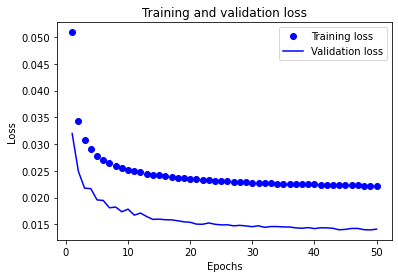

In [5]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [6]:
predictions = model.predict(test_images, batch_size=128)

79/79 [==============================] - 0s 2ms/step


In [7]:
predictions.shape

(10000, 784)

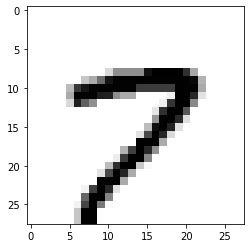

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

digit = tf.reshape(test_images[123], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

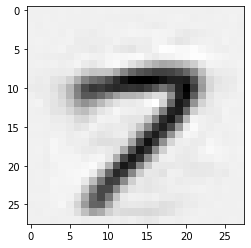

In [9]:
digit = tf.reshape(predictions[123], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()